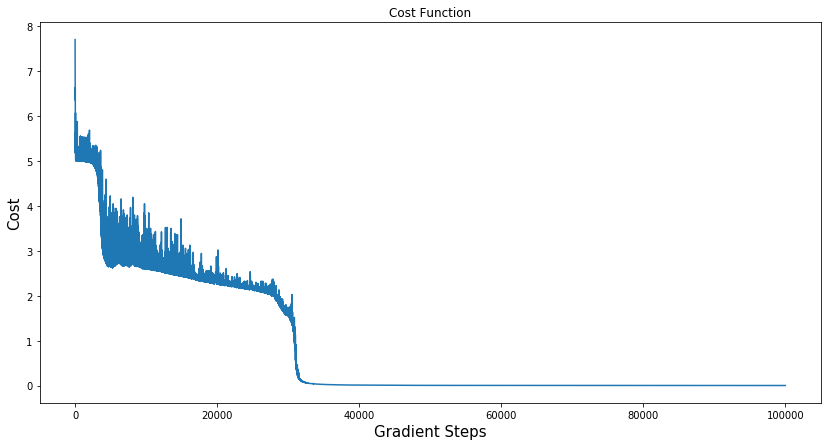

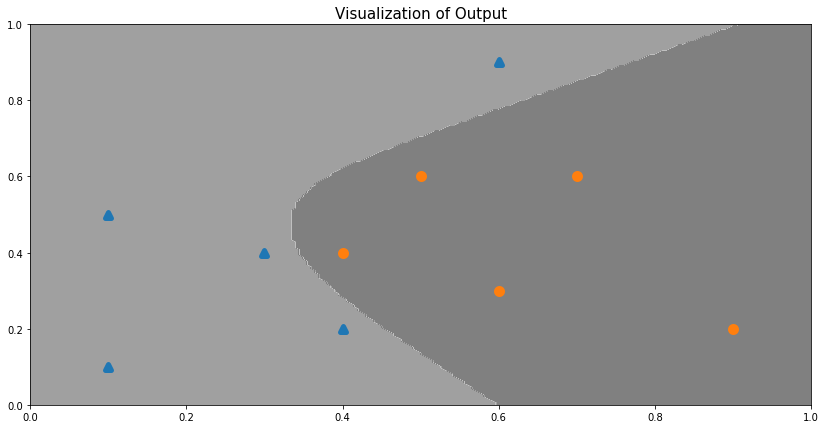

In [1]:
import numpy as np
import numpy.random as npr
import sys
from timeit import default_timer as dt
from math import e
import matplotlib.pyplot as plt


def activate(x,W,b):
    '''Defines our activation
       function based on the 
       sigmoid activation.
       Takes in the previous neurons
       connected outputs x / our 
       weights W / our bias vector
       b'''
    return(1/(1+np.exp(-(np.dot(W,x)+b)))) #entire exponent is negative is key

def cost(W2,W3,W4,b2,b3,b4,x1,x2,y):
    '''Takes in our weight matrices
       and bias vectors and computes
       the cost function as defined 
       in the literature as our final
       neurons values, a4 below,
       in respect to the true output
       squared
       x1 - data
       x2 - true labels
       y - predicted points
       Cost is run through Niter #
       of times 
       
    '''
    costvector = np.zeros((10, 1))
    x = np.zeros((2,  1))
    for i in np.arange(costvector.shape[0]):
        x[0,0], x[1,0] = x1[i], x2[i]
        a2 = activate(x,  W2, b2)
        a3 = activate(a2, W3, b3)
        a4 = activate(a3, W4, b4)
        costvector[i] = np.linalg.norm(a4.ravel()-y[:,i], 2)

    return np.linalg.norm(costvector, 2)**2

def inference(W2, W3, W4, b2, b3, b4, x_vec):
    '''Takes in adjusted weights and 
       biases from cost function that
       have run through our network and
       return an output layer of 
       a^[L] = a^4 as the predicted
       measure
       Takes in processed weights
       and biases and 'activates'
       through the network using
       input xvector data points
       and produces a^Lth neuron 
       for our prediction
    '''
    a2 = activate(xvec, W2, b2)
    a3 = activate(a2,   W3, b3)
    a4 = activate(a3,   W4, b4)

    return a4


x1 = np.array([0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7]) #data
x2 = np.array([0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6]) 

y           = np.zeros((2, 10)) #labels (fires or does not fire) 
y[0:1, 0:5] = np.ones((1,  5))
y[0:1, 5: ] = np.zeros((1, 5))
y[0:1, 5: ] = np.zeros((1, 5))
y[1: , 5: ] = np.ones((1,  5))

#Normal randomization used to initialize weight matrices and biases
W2 =  npr.uniform(size = (2,2)) #where 1st arg is the current layer size, 2nd is previous arg size
W3 =  npr.uniform(size = (3,2)) 
W4 =  npr.uniform(size = (2,3))

b2 = npr.uniform(size = (2,1))
b3 = npr.uniform(size = (3,1))
b4 = npr.uniform(size = (2,1))

eta = .45                                # our learning rate in paper is .05, tried .4 to improve
                                        # our cost 
Niter = 100000                          #number of SG iterations

savecost = np.zeros((Niter,1))           #save the value of our cost function

xvec = np.zeros((2,1))
yvec = np.zeros((2,1))


for counter in range(Niter):
    k = npr.randint(10)                     #choose a training node
    xvec[0,0], xvec[1,0] = x1[k], x2[k]     #populate our input vectors
    yvec[:,0] = y[:, k]                     #define our randomly selected node for loss purposes
    
    #forward pass algorithm below
    a2 = activate(xvec,W2,b2)               #first neuron has input vector of data 
    a3 = activate(a2,W3,b3)                 #second neuron uses a^1 as input data
    a4 = activate(a3,W4,b4)
    
     #backward pass now
    
    delta4 = a4*(1 - a4)*(a4-yvec)            #delta, our loss term, calculated from final neuron
                                              #along with our randomly chosen node and correct label value
    delta3 = a3*(1 - a3)* np.dot(W4.T,delta4) #these are defined such that they abide by
    delta2 = a2*(1 - a2)* np.dot(W3.T,delta3) #the loss partial derivate rules prove in section 5
     #gradient step
    W2 -= eta*delta2*xvec.T             #update our Weights and biases using loss function, or delta
    W3 -= eta*delta3*a2.T               #weights and biases calculated and then entered into cost function to verify decay
    W4 -= eta*delta4*a3.T
    b2 -= eta*delta2
    b3 -= eta*delta3
    b4 -= eta*delta4
    
    savecost[counter] = cost(W2,W3,W4,b2,b3,b4,x1,x2,y)  #store our cost to observe
    
#We are predicting a 'fire' or 'not fire' to predict an x or O on on the map given an
#ordered pair


plt.figure(figsize=(14,7))
plt.plot(savecost)
plt.xlabel('Gradient Steps',fontsize=15)
plt.ylabel('Cost',fontsize=15)
plt.title('Cost Function')
plt.show

X, Y = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))

X1 = np.array(X.ravel())
X2 = np.array(Y.ravel())

XTest  = np.stack((X1, X2), axis = 1)
empty  = np.zeros(200*200)


for i in np.arange(XTest.shape[0]):

    xvec[0,0], xvec[1,0] = XTest[i, 0], XTest[i, 1]


    YPredictions = inference(W2, W3, W4, b2, b3, b4, xvec)
    YPredictions = np.array(YPredictions[0] >= YPredictions[1])


    if YPredictions[0] == True:
        empty[i] = 1


Pred = empty.reshape((200, 200))
plt.figure(figsize=(14,7))
plt.title('Visualization of Output',fontsize=15)
plt.contourf(X,Y,Pred,colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')

plt.scatter(x1[0:5], x2[0:5], marker='^', lw=5)
plt.scatter(x1[5:],  x2[5:], marker='o', lw=5)
plt.show()


In [38]:
import numpy as np
import numpy.random as npr
import sys
from timeit import default_timer as dt
from math import e
import matplotlib.pyplot as plt


def activate(x,W,b):
    '''Defines our activation
       function based on the 
       sigmoid activation.
       Takes in the previous neurons
       connected outputs x / our 
       weights W / our bias vector
       b'''
    return(1/(1+np.exp(-(np.dot(W,x)+b)))) #entire exponent is negative is key

(1) $\hspace{5mm}$ Here we define the backbone of our neural network, which is the activation function. Here we utilize the sigmoid function, or $$\sigma(x) = \frac{1}{1+e^{-x}}$$ which represents a smoothed step function of sorts. Passing through weight matrices, $W$, and bias vectors, $b$, which hold the values to shift and stretch each neuron as it learns through each gradient iteration ultimately enables the firing of proper neurons to accurately make inferences on a desired data set.

In [39]:
def cost(W2,W3,W4,b2,b3,b4,x1,x2,y):
    '''Takes in our weight matrices
       and bias vectors and computes
       the cost function as defined 
       in the literature as our final
       neurons values, a4 below,
       in respect to the true output
       squared
       x1 - data
       x2 - true labels
       y - predicted points
       Cost is run through Niter #
       of times 
       
    '''
    costvector = np.zeros((10, 1))
    x = np.zeros((2,  1))
    for i in np.arange(costvector.shape[0]):
        x[0,0], x[1,0] = x1[i], x2[i]
        a2 = activate(x,  W2, b2)
        a3 = activate(a2, W3, b3)
        a4 = activate(a3, W4, b4)
        costvector[i] = np.linalg.norm(a4.ravel()-y[:,i], 2)

    return np.linalg.norm(costvector, 2)**2

(2) $\hspace{5mm}$ Here we see the installment of the cost function, which is used later in the derivation of our $\delta$ functions for use in forward and backward propogation for the means of updating our weight and bias matrices used to shift and stretch our activation function. For now, our cost function is modeled after the equation $$Cost = \frac{1}{N}\sum_{i=1}^{N}\frac{1}{2}||y(x^{{i}}) - a^{[L]}(x^{{i}})||_{2}^{2}$$

where $a^{l}$ runs from $l=2,3,...L$ and represents a neron at layer $l$ for $L$ being our final neuron. $a^{l}$ can be seen as the function describing the output, or the firing or not firing, of neuron $l$ as described by $a^{l} = \sigma(W^{l}a^{l-1}+b^{l}) \in \mathbb{R}^{n_{l}}$ based on the output of the previous neuron and the current weights and biases. Once run through the entire gradient step of the network, the loss is calculated from the activation pattern of our last neuron layer to be compared against our actual values int eh stored $y$ vector. 

In [40]:
def inference(W2, W3, W4, b2, b3, b4, x_vec):
    '''Takes in adjusted weights and 
       biases from cost function that
       have run through our network and
       return an output layer of 
       a^[L] = a^4 as the predicted
       measure
       Takes in processed weights
       and biases and 'activates'
       through the network using
       input xvector data points
       and produces a^Lth neuron 
       for our prediction
    '''
    a2 = activate(xvec, W2, b2)
    a3 = activate(a2,   W3, b3)
    a4 = activate(a3,   W4, b4)

    return a4

(3) $\hspace{5mm}$ Here is a simple inference step once our weights and biases are properly trained according to our desired step count and learning rate. This takes in our weights and biases and our x_vec we wish to make predictions on and run them through our activation neurons to determine their grouping on our 2-D plane. 

In [41]:
x1 = np.array([0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7]) #data
x2 = np.array([0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6]) 

y           = np.zeros((2, 10)) #labels (fires or does not fire) 
y[0:1, 0:5] = np.ones((1,  5))
y[0:1, 5: ] = np.zeros((1, 5))
y[0:1, 5: ] = np.zeros((1, 5))
y[1: , 5: ] = np.ones((1,  5))

#Normal randomization used to initialize weight matrices and biases
W2 =  npr.uniform(size = (2,2)) #where 1st arg is the current layer size, 2nd is previous arg size
W3 =  npr.uniform(size = (3,2)) 
W4 =  npr.uniform(size = (2,3))

b2 = npr.uniform(size = (2,1))
b3 = npr.uniform(size = (3,1))
b4 = npr.uniform(size = (2,1))

(4) $\hspace{5mm}$ We have above an initialization of our data points on our 2-D plane through the $x1$ and $x2$ arrays. From there, the data labels are constructed in our $y$ arrays as either x's or o's as represented by either a 1 or a 0. The standard practice of initializing our weights and biases is done through sampling from a uniform distribution. This gives some sort of starting value for our network to at least begin conducting gradient losses at the beginning of training. 

In [42]:
eta = .4                                # our learning rate in paper is .05, tried .4 to improve
                                        # our cost 
Niter = 100000                          #number of SG iterations

savecost = np.zeros((Niter,1))           #save the value of our cost function

xvec = np.zeros((2,1))
yvec = np.zeros((2,1))

(5) $\hspace{5mm}$ The most important mathematical topic in this block is the $\eta$ variable, which represents our learning rate and allows us to go into the deeper mathematics of stochastic gradient descent and its use in our network. $\eta$ comes into play with updating our cost function given our vector $p$, which is defined as the general vector of our weights, $W$, and our biases, $b$. As background, our cost function as we perturb our $p$ values is defined as $$Cost(p + \Delta p) \approx Cost(p) + \sum_{r=1}^{s}\frac{\partial Cost(p)}{\partial p_{r}}\Delta p_{r}$$ in respect to our $r^{th}$ parameter. Since we wish to update our weights and biases in the direction of negative of our cost value evaluated at $p$, we then get the update of $$p \rightarrow p - \eta \nabla Cost(p)$$ where $$(\nabla Cost(p))_{r} = \frac{\partial Cost(p)}{\partial p_{r}}$$ at our $r^{th}$ parameter yet again. Thus, our $\eta$ variable is key in possibly erasing the issue of falling into a trough with our loss function as seen by a stagnant cost function at a relatively high value. 

In [43]:
for counter in range(Niter):
    k = npr.randint(10)                     #choose a training node
    xvec[0,0], xvec[1,0] = x1[k], x2[k]     #populate our input vectors
    yvec[:,0] = y[:, k]                     #define our randomly selected node for loss purposes
    

(6) $\hspace{5mm}$ Here, we begin our loop at our prescribed number of gradient steps, with the most important aspect of this block being our $k$ variable. This represents a cheaper alternative to the mean of the individual gradients over all our training points by instead randomly choosing a training point from our available nodes of our network. This is seen by our $yvec$, which is used later on in our backpropigation, as being populated with our randomly chosen single node for the purpose of calculating our cost function. 

In [45]:
#forward pass algorithm below
a2 = activate(xvec,W2,b2)               #first neuron has input vector of data 
a3 = activate(a2,W3,b3)                 #second neuron uses a^1 as input data
a4 = activate(a3,W4,b4)

(7) $\hspace{5mm}$ Here is the beginning of the training of our network utilizing much of the initialization of our weights, biases, and training data described in prior blocks. With notation lifted from the paper, $[a2,a3,a4]$ represent the neurons of our neural network, with our first neuron taking in our $xvec$ of training data as its input vector. The sigmoid activation, as outlined in our first block, is used here to take in our weights an biases and produce a value along the shifted curve. 

In [ ]:
 #backward pass now
    
    delta4 = a4*(1 - a4)*(a4-yvec)            #delta, our loss term, calculated from final neuron
                                              #along with our randomly chosen node and correct label value
    delta3 = a3*(1 - a3)* np.dot(W4.T,delta4) #these are defined such that they abide by
    delta2 = a2*(1 - a2)* np.dot(W3.T,delta3) #the loss partial derivate rules prove in section 5
    

(8) $\hspace{5mm}$ This is where the bulk of the mathematics and derivations come into play for our network and where the gradient vector with our cost function and weighted inputs becomes used define delta values above, or $\delta$ error values. 

Let $z^{[l]} = W^{[l]}a^{l-1]} + b^{[l]} \in R^{n_{l}}$ is the input for our $l^{th}$ neuron, and we can represent our subsequent neuron as $a^{[l]} = \sigma(z^{[l]})$ for $l = 2,3,...L$. Let us also represent our cost here as $C = \frac{1}{2}||y - a^[L]||_{2}^{2}$ for our fixed, randomly chosen, training point. Our error expression at our $j^{th}$ neuron an at our $l^{th}$ layer is to be defined as $$\delta_{j}^{[l]} = \frac{\partial C}{\partial z_{j}^{[l]}} \textrm{ for } 1 \leq j \leq n_{l} \textrm{ and } 2 \leq l \leq L$$ 

Where $L$ again is the last layer of our network. This error term is key in measuring the sensitivity of our cost function to the weighted input for neuron $j$ at layer $l$. 

We then yield the following expressions to be used in our backwards propogation step in the block above:
$\begin{align*}
& (1.0)\hspace{5mm} \delta^{[L]} = \sigma^{'}(z^{[L]}) \circ (a^{L} - y)\\
& (1.1)\hspace{5mm} \delta^{[l]} = \sigma^{'}(z^{[l]}) \circ (W^{[l+1]})^{T} \delta^{[l+1]}\\
& (1.2)\hspace{5mm} \frac{\partial C}{\partial b_{j}^{[l]}} = \delta_{j}^{[l]}\\
& (1.3)\hspace{5mm} \frac{\partial C}{\partial w_{jk}^{[l]}} = \delta_{j}^{[l]}a_{k}^{[l-1]}
\end{align*}$

Where $\circ$ is the hadamard product between two vecotrs, or the componentwise product of two vectors. 

These expressions are a direct results of derivations using the chain rule and can easily be proven and are shown in section 5 of $\textit{Deep Learning for Applied Mathematicians}$

In our block above, delta4 is the $L^{th}$ error function as shown in (1.0). 

delta3 and delta2 as we move back up our networks layers are shown through equation (1.1).

In [ ]:
 #gradient step
    W2 -= eta*delta2*xvec.T             #update our Weights and biases using loss function, or delta
    W3 -= eta*delta3*a2.T               #weights and biases calculated and then entered into cost function to verify decay
    W4 -= eta*delta4*a3.T
    b2 -= eta*delta2
    b3 -= eta*delta3
    b4 -= eta*delta4
    
    savecost[counter] = cost(W2,W3,W4,b2,b3,b4,x1,x2,y)  #store our cost to observe

(9) $\hspace{5mm}$ In our last block, we go back through our weights and biases and update them in the $-\nabla Cost(p)$ direction with the formula $$(1.4) \hspace{5mm} p \rightarrow p - \eta \nabla Cost(p)$$ as mentioned in block 5. Each weight matrix $W_{n}$ for $n = 2,...,L$  and bias vector $b_{n}$ for $n = 2,...,L$ is updated according to formula (1.4) for each of our prescribed gradient iterations. 